# Import libraries and settings

In [226]:
import pandas as pd
pd.set_option('max_colwidth', 500)
pd.set_option("max_rows", 500)

# Articles published 2009-2011

## Check logs

## Import data

In [233]:
titles = pd.read_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/raw/medium_scrapy_titles_2009-2011.csv")

full = pd.read_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/raw/medium_scrapy_2009-2011.csv")

In [234]:
print("Full:", full.shape)
print("Titles:", titles.shape)

Full: (6, 9)
Titles: (6, 2)


## Clean URL in full article data table

In [185]:
full['articleLink'] = full['articleURL'].str.split('?').str[0]

full.drop('articleURL', axis=1, inplace=True)

full.drop_duplicates(keep='first', inplace=True)

print(full.shape)

full.head()

(6, 9)


,NumOfClaps,NumOfComments,article,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink
0,NaN,NaN,Learning From Last Year (Part II),"Machine Learning,Data Science",https://medium.com/@StanfordReviewStaff,StanfordReviewStaff,"Mar 9, 2010",3 min read,https://medium.com/stanfordreview/learning-from-last-year-part-ii-61b5c716e8ca
1,144 claps,1.0,Data Mining — Handling Missing Values the Database,"Data Science,Machine Learning",https://developerzen.com/@ekampf,Eran Kampf,"Aug 14, 2009",3 min read,https://developerzen.com/data-mining-handling-missing-values-the-database-bd2241882e72
2,NaN,NaN,Of brains and cities; neuroscience and cultures of decision-making,"Neuroscience,Science,Urban Planning,Strategic Design,Data Science",https://medium.com/@cityofsound,Dan Hill,"Dec 20, 2011",20 min read,https://medium.com/dark-matter-and-trojan-horses/of-brains-and-cities-neuroscience-and-cultures-of-decision-making-6bc6abb48d4b
3,NaN,NaN,Rethinking: Cloud & Enterprise Computing,"Big Data,Data Sciences,Innovation,Machine Learning,Strategy",https://medium.quantiply.com/@quantiply,Quantiply,"Nov 22, 2009",10 min read,https://medium.quantiply.com/rethinking-cloud-enterprise-computing-8205851c2c02
4,15 claps,NaN,Search engine vs Database in BI - 1,"Big Data,Sql,Database,Data Science,Analytics",https://blog.matters.tech/@batmansmk,Bat Manson,"Jun 27, 2011",5 min read,https://blog.matters.tech/search-engine-vs-database-in-bi-part-1-ac97f950d6f8


## Clean URL in titles data table

In [186]:
titles['articleLink'] = titles['articleURL'].str.split('?').str[0]

titles.drop('articleURL', axis=1, inplace=True)

titles.drop_duplicates(subset=['article', 'articleLink'], keep='first', inplace=True)

print(titles.shape)

titles.head()

(6, 2)


,article,articleLink
0,NaN,https://developerzen.com/data-mining-handling-missing-values-the-database-bd2241882e72
1,Rethinking: Cloud & Enterprise Computing,https://medium.quantiply.com/rethinking-cloud-enterprise-computing-8205851c2c02
2,Learning From Last Year (Part II),https://medium.com/stanfordreview/learning-from-last-year-part-ii-61b5c716e8ca
3,Of brains and cities; neuroscience and cultures of decision-making,https://medium.com/dark-matter-and-trojan-horses/of-brains-and-cities-neuroscience-and-cultures-of-decision-making-6bc6abb48d4b
4,Search engine vs Database in BI - 2,https://blog.matters.tech/search-engine-vs-database-in-bi-part-2-1b191363424d


## Merge two data tables to check for discrepancies

In [188]:
x = full.merge(titles, how='outer', left_on='articleLink', right_on='articleLink' )

x['article_y'] = x['article_y'].combine_first(x['article_x'])

x.drop(['article_x'], axis=1, inplace=True)

In [191]:
x

,NumOfClaps,NumOfComments,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink,article_y
0,NaN,NaN,"Machine Learning,Data Science",https://medium.com/@StanfordReviewStaff,StanfordReviewStaff,"Mar 9, 2010",3 min read,https://medium.com/stanfordreview/learning-from-last-year-part-ii-61b5c716e8ca,Learning From Last Year (Part II)
1,144 claps,1.0,"Data Science,Machine Learning",https://developerzen.com/@ekampf,Eran Kampf,"Aug 14, 2009",3 min read,https://developerzen.com/data-mining-handling-missing-values-the-database-bd2241882e72,Data Mining — Handling Missing Values the Database
2,NaN,NaN,"Neuroscience,Science,Urban Planning,Strategic Design,Data Science",https://medium.com/@cityofsound,Dan Hill,"Dec 20, 2011",20 min read,https://medium.com/dark-matter-and-trojan-horses/of-brains-and-cities-neuroscience-and-cultures-of-decision-making-6bc6abb48d4b,Of brains and cities; neuroscience and cultures of decision-making
3,NaN,NaN,"Big Data,Data Sciences,Innovation,Machine Learning,Strategy",https://medium.quantiply.com/@quantiply,Quantiply,"Nov 22, 2009",10 min read,https://medium.quantiply.com/rethinking-cloud-enterprise-computing-8205851c2c02,Rethinking: Cloud & Enterprise Computing
4,15 claps,NaN,"Big Data,Sql,Database,Data Science,Analytics",https://blog.matters.tech/@batmansmk,Bat Manson,"Jun 27, 2011",5 min read,https://blog.matters.tech/search-engine-vs-database-in-bi-part-1-ac97f950d6f8,Search engine vs Database in BI - 1
5,NaN,NaN,"Database,Sql,Software Architecture,Data Science",https://blog.matters.tech/@batmansmk,Bat Manson,"Aug 26, 2011",4 min read,https://blog.matters.tech/search-engine-vs-database-in-bi-part-2-1b191363424d,Search engine vs Database in BI - 2


## Convert "numClaps" column to numeric

In [192]:
x['NumOfClaps'] = x['NumOfClaps'].str.replace('claps', '')

x['NumOfClaps'] = x['NumOfClaps'].str.replace('clap', '')

x['NumOfClaps'].fillna(0, inplace=True)

x['NumOfClaps'] = x['NumOfClaps'].astype(int)

## Fill None values in "NumofComments" column

In [193]:
x['NumOfComments'].fillna(0, inplace=True)

x['NumOfComments'] = x['NumOfComments'].astype(int)

## Fill empty "ReadingTime" column with "1 min read"

In [194]:
import numpy as np

x['readingTime'] = x['readingTime'].str.replace(' min read', '')

x['readingTime'] = x['readingTime'].replace(' ', np.nan)

x['readingTime'].fillna(1, inplace=True)

In [195]:
x

,NumOfClaps,NumOfComments,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink,article_y
0,0,0,"Machine Learning,Data Science",https://medium.com/@StanfordReviewStaff,StanfordReviewStaff,"Mar 9, 2010",3,https://medium.com/stanfordreview/learning-from-last-year-part-ii-61b5c716e8ca,Learning From Last Year (Part II)
1,144,1,"Data Science,Machine Learning",https://developerzen.com/@ekampf,Eran Kampf,"Aug 14, 2009",3,https://developerzen.com/data-mining-handling-missing-values-the-database-bd2241882e72,Data Mining — Handling Missing Values the Database
2,0,0,"Neuroscience,Science,Urban Planning,Strategic Design,Data Science",https://medium.com/@cityofsound,Dan Hill,"Dec 20, 2011",20,https://medium.com/dark-matter-and-trojan-horses/of-brains-and-cities-neuroscience-and-cultures-of-decision-making-6bc6abb48d4b,Of brains and cities; neuroscience and cultures of decision-making
3,0,0,"Big Data,Data Sciences,Innovation,Machine Learning,Strategy",https://medium.quantiply.com/@quantiply,Quantiply,"Nov 22, 2009",10,https://medium.quantiply.com/rethinking-cloud-enterprise-computing-8205851c2c02,Rethinking: Cloud & Enterprise Computing
4,15,0,"Big Data,Sql,Database,Data Science,Analytics",https://blog.matters.tech/@batmansmk,Bat Manson,"Jun 27, 2011",5,https://blog.matters.tech/search-engine-vs-database-in-bi-part-1-ac97f950d6f8,Search engine vs Database in BI - 1
5,0,0,"Database,Sql,Software Architecture,Data Science",https://blog.matters.tech/@batmansmk,Bat Manson,"Aug 26, 2011",4,https://blog.matters.tech/search-engine-vs-database-in-bi-part-2-1b191363424d,Search engine vs Database in BI - 2


## Output final data to CSV

In [213]:
x.to_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/processed/medium_scrapy_2009-2011_validated.csv",
         index=None)

# Articles published 2012-2013

## Import data

In [35]:
titles = pd.read_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/raw/medium_titles_2016.csv")

full = pd.read_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/raw/medium_full_2016.csv")

In [36]:
print("Full:", full.shape)
print("Titles:", titles.shape)

Full: (4778, 9)
Titles: (4982, 2)


## Clean URL in full article data table

In [37]:
full['articleLink'] = full['articleURL'].str.split('?').str[0]

full.drop('articleURL', axis=1, inplace=True)

full.drop_duplicates(keep='first', inplace=True)

print(full.shape)

full.head()

(4720, 9)


,NumOfClaps,NumOfComments,article,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink
0,6 claps,NaN,It’s 2016. Don’t expand your storage clusters....,"Cloud Computing,Data Science,Startup",https://blog.skcript.com/@karthikk,Karthik K,"Jan 9, 2016",4 min read,https://blog.skcript.com/it-s-2016-don-t-expan...
1,NaN,NaN,"Shades of Grey: What Data Should be Shared, Ho...","Data Science,Big Data",https://medium.com/@alexRutherford,Alex Rutherford,"Jan 1, 2016",4 min read,https://medium.com/@alexRutherford/shades-of-g...
2,NaN,NaN,"Stories, and Statistics","Philosophy,Data Science,Reasoning",https://medium.com/@rkris,rkris,"Jan 2, 2016",2 min read,https://medium.com/@rkris/stories-and-statisti...
3,NaN,NaN,"This Year, Remember The Error Term","Data Science,Statistics,Science",https://medium.com/@rkris,rkris,"Jan 3, 2016",,https://medium.com/@rkris/this-year-remember-t...
4,NaN,NaN,NPR’s Planet Money Podcast Explains A/B Testin...,"Startup,A B Testing,NPR,Data Science,Artficial...",https://medium.com/@OpexAnalytics,Opex Analytics,"Jan 4, 2016",2 min read,https://medium.com/opex-analytics/nprs-planet-...


## Clean URL in titles data table

In [40]:
titles['articleLink'] = titles['articleURL'].str.split('?').str[0]

titles.drop('articleURL', axis=1, inplace=True)

titles.drop_duplicates(subset=['article', 'articleLink'], keep='first', inplace=True)

print(titles.shape)

In [41]:
titles.to_csv("test_2016.csv", index=False)

## Merge two data tables to check for discrepancies

In [202]:
x = full.merge(titles, how='outer', left_on='articleLink', right_on='articleLink' )

x['article_y'] = x['article_y'].combine_first(x['article_x'])

x.drop(['article_x', 'postingTime_x'], axis=1, inplace=True)

## Replace erroneous titles manually

In [203]:
x['article_y'] = x['article_y'].str.replace('I love Medium.', 'What I Learned From Analyzing 1,000 Medium Collections')

In [204]:
x['article_y'] = x['article_y'].str.replace('A couple of weeks ago', 
                                            'How to Make Medium the World’s Greatest “Collaborative Idea-Generation and Distribution” Platform')

In [205]:
x

,NumOfClaps,NumOfComments,articleTags,linkOfAuthorProfile,nameOfAuthor,readingTime,articleLink,article_y,postingTime_y
0,NaN,NaN,"Open Source,Data Science,Travel,Life",https://tech.goibibo.com/@goibibo_tech,Goibibo Tech,2 min read,https://tech.goibibo.com/3-years-exhilarated-team-52a760bb872,3 Years!! exhilarated team!!,"Sep 5, 2012"
1,NaN,NaN,"Data Science,Mtbf,Reliability",https://medium.com/@fmsReliability,Fred Schenkelberg,4 min read,https://medium.com/musings-on-reliability-and-maintenance-topics/weakest-link-2fabf44d4e98,Weakest Link,"Jan 10, 2012"
2,NaN,NaN,"Personal,Big Data,Content Cows,Content Farms,Data Science",https://inadequate.net/@inadequatenet,William O. Pate II,4 min read,https://inadequate.net/small-thoughts-blogging-freedom-and-privacy-117aeb396a0f,"Small Thoughts | Blogging, Freedom and Privacy","Apr 22, 2013"
3,285 claps,2.0,"Programming,Data Science,Computer Science,Information Retrieval,Machine Learning",https://medium.com/@wolfgarbe,Wolf Garbe,6 min read,https://medium.com/@wolfgarbe/1000x-faster-spelling-correction-algorithm-2012-8701fcd87a5f,1000x Faster Spelling Correction algorithm (2012),"Jun 6, 2012"
4,691 claps,15.0,"Data Science,Consumer Data Science,Machine Learning,Personalization,Recommendations",https://medium.com/@NetflixTechBlog,Netflix Technology Blog,10 min read,https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-2-d9b96aa399f5,Netflix Recommendations: Beyond the 5 stars (Part 2),"Jun 19, 2012"
5,NaN,NaN,Data Science,https://medium.com/@tobrien,Tim O'Brien,2 min read,https://medium.com/@tobrien/please-big-data-people-just-say-what-you-mean-f9158ae7e939,"Please, Big Data people, just say what you mean…","Aug 20, 2012"
6,NaN,NaN,"Personal,Big Data As Big Brother,Coding,Commencement,Data Science",https://inadequate.net/@inadequatenet,William O. Pate II,4 min read,https://inadequate.net/weekend-reading-22-23-june-2013-c426b5424339,Weekend Reading — 22–23 JUNE 2013,"Jun 22, 2013"
7,NaN,NaN,"Big Data,Business,Data Science",https://medium.com/@MarcosOrtiz,Marcos Ortiz,2 min read,https://medium.com/a-data-driven-guy/innovation-hard-work-and-constant-learning-at-hadapt-36258c93c0a2,"Innovation, hard work and constant learning at Hadapt","Oct 22, 2012"
8,NaN,NaN,"Big Data,Data Science,Data Visualization",https://medium.com/@mdcbowen,Michael DC Bowen,4 min read,https://medium.com/@mdcbowen/full360-likes-jaspersoft-5-ea1766e093fb,Full360 Likes Jaspersoft 5,"Nov 14, 2012"
9,NaN,NaN,"Sql,Data Science,Data Analysis",https://medium.com/@josiplazarevski,Josip Lazarevski,3 min read,https://medium.com/@josiplazarevski/covering-indexes-with-included-columns-c2c254cf7227,Covering Indexes with Included Columns,"Dec 9, 2012"


In [161]:
x.shape

(67, 9)

## Convert "numClaps" column to numeric

In [206]:
x['NumOfClaps'] = x['NumOfClaps'].str.replace('claps', '')

x['NumOfClaps'] = x['NumOfClaps'].str.replace('clap', '')

x['NumOfClaps'].fillna(0, inplace=True)

x['NumOfClaps'] = x['NumOfClaps'].astype(int)

## Fill None values in "NumofComments" column

In [207]:
x['NumOfComments'].fillna(0, inplace=True)

x['NumOfComments'] = x['NumOfComments'].astype(int)

## Fill empty "ReadingTime" column with "1 min read"

In [208]:
import numpy as np

x['readingTime'] = x['readingTime'].str.replace(' min read', '')

x['readingTime'] = x['readingTime'].replace(' ', np.nan)

x['readingTime'].fillna(1, inplace=True)

In [210]:
x.head()

,NumOfClaps,NumOfComments,articleTags,linkOfAuthorProfile,nameOfAuthor,readingTime,articleLink,article_y,postingTime_y
0,0,0,"Open Source,Data Science,Travel,Life",https://tech.goibibo.com/@goibibo_tech,Goibibo Tech,2,https://tech.goibibo.com/3-years-exhilarated-team-52a760bb872,3 Years!! exhilarated team!!,"Sep 5, 2012"
1,0,0,"Data Science,Mtbf,Reliability",https://medium.com/@fmsReliability,Fred Schenkelberg,4,https://medium.com/musings-on-reliability-and-maintenance-topics/weakest-link-2fabf44d4e98,Weakest Link,"Jan 10, 2012"
2,0,0,"Personal,Big Data,Content Cows,Content Farms,Data Science",https://inadequate.net/@inadequatenet,William O. Pate II,4,https://inadequate.net/small-thoughts-blogging-freedom-and-privacy-117aeb396a0f,"Small Thoughts | Blogging, Freedom and Privacy","Apr 22, 2013"
3,285,2,"Programming,Data Science,Computer Science,Information Retrieval,Machine Learning",https://medium.com/@wolfgarbe,Wolf Garbe,6,https://medium.com/@wolfgarbe/1000x-faster-spelling-correction-algorithm-2012-8701fcd87a5f,1000x Faster Spelling Correction algorithm (2012),"Jun 6, 2012"
4,691,15,"Data Science,Consumer Data Science,Machine Learning,Personalization,Recommendations",https://medium.com/@NetflixTechBlog,Netflix Technology Blog,10,https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-2-d9b96aa399f5,Netflix Recommendations: Beyond the 5 stars (Part 2),"Jun 19, 2012"


## Output final data to CSV

In [212]:
x.to_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/processed/medium_scrapy_2012-2013_validated.csv", 
         index=None)

# Articles published 2018

## Import data

In [75]:
import pandas as pd

titles = pd.read_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/raw/medium_titles_2018.csv")

full = pd.read_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/raw/medium_full_2018.csv")

In [76]:
print("Full:", full.shape)
print("Titles:", titles.shape)

Full: (19697, 9)
Titles: (19637, 2)


## Clean URL in full article data table

In [77]:
full['articleLink'] = full['articleURL'].str.split('?').str[0]

full.drop('articleURL', axis=1, inplace=True)

full.drop_duplicates(keep='first', inplace=True)

full.dropna(inplace=True)

In [78]:
full.shape

(4576, 9)

In [28]:
full.to_csv("test.csv", index=False)

## Clean URL in titles data table

In [73]:
titles['articleLink'] = titles['articleURL'].str.split('?').str[0]

titles.drop('articleURL', axis=1, inplace=True)

titles.drop_duplicates(subset=['article', 'articleLink'], keep='first', inplace=True)

print(titles.shape)

(19317, 2)


## Merge two data tables to check for discrepancies

In [62]:
x = full.merge(titles, how='outer', left_on='articleLink', right_on='articleLink' )

x['article_x'] = x['article_x'].combine_first(x['article_y'])

In [66]:
pd.set_option('max.colwidth', 500)
x[x['article_y'].str.split().str.len() > 25]

,NumOfClaps,NumOfComments,article_x,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink,article_y
4326,15 claps,1.0,"At NVIDIA, Deep Learning Gets Deeper","Artificial Intelligence,Deep Learning,Machine Learning,Data Science,Technology",https://medium.com/@ODSC,#ODSC - Open Data Science,"Dec 28, 2018",4 min read,https://medium.com/@ODSC/at-nvidia-deep-learning-gets-deeper-99fa4e5b4af4,"At NVIDIA, Deep Learning Gets Deeper,Alison Lowndes and her team at NVIDIA are finding exciting new ways to handle the demands deep learning places on machines — and even more exciting ways to use the new…"
6477,NaN,NaN,"Nasce Data Life lab il laboratorio congiunto fra Università di Firenze e la startup Kinoa per la ricerca sociale tramite internet of things, social networks e big data",NaN,NaN,NaN,NaN,NaN,https://medium.com/kinoa/ogni-giorno-lasciamo-scie-digitali-che-parlano-di-noi-627cc9f4c2ca,"Nasce Data Life lab il laboratorio congiunto fra Università di Firenze e la startup Kinoa per la ricerca sociale tramite internet of things, social networks e big data"
6978,NaN,NaN,"Putting glioblastoma in its place,Glioblastoma multiforme (GBM) is a highly aggressive form of brain cancer, with a median survival time of just one year following diagnosis. Treatment is complicated by…",NaN,NaN,NaN,NaN,NaN,https://medium.com/@sema4/putting-glioblastoma-in-its-place-1f81a31c3adb,"Putting glioblastoma in its place,Glioblastoma multiforme (GBM) is a highly aggressive form of brain cancer, with a median survival time of just one year following diagnosis. Treatment is complicated by…"
7863,NaN,NaN,"How to Decide: Machine Learning and the Science of Choosing,Scratch the surface of where decision optimization is headed over the next months and years and see how goals + predictions + rules + data =…",NaN,NaN,NaN,NaN,NaN,https://medium.com/@xtaraim/how-to-decide-machine-learning-and-the-science-of-choosing-92c93ea3495c,"How to Decide: Machine Learning and the Science of Choosing,Scratch the surface of where decision optimization is headed over the next months and years and see how goals + predictions + rules + data =…"
8621,NaN,NaN,"hi Tran,thanks for your article. I trained my own model of raccoon as your guide,but when i use an image below (a bear),the model detected it as a raccoon too,then i tried your trained model of raccoon on git,the result…",NaN,NaN,NaN,NaN,NaN,https://medium.com/@rambler.user/hi-tran-thanks-for-your-article-bad6f99d0c23,"hi Tran,thanks for your article. I trained my own model of raccoon as your guide,but when i use an image below (a bear),the model detected it as a raccoon too,then i tried your trained model of raccoon on git,the result…"
9925,NaN,NaN,"Meet Ben, a Senior Data Engineer in our flourishing Data team. He talks us through his career history to date and why he decided , would be his next venture!",NaN,NaN,NaN,NaN,NaN,https://medium.com/life-with-team-noths/meet-ben-a-senior-data-engineer-in-our-flourishing-data-team-bcbfa138adda,"Meet Ben, a Senior Data Engineer in our flourishing Data team. He talks us through his career history to date and why he decided , would be his next venture!"
10423,NaN,NaN,"A Random Forest Predicted the World Cup winner, an AI scripted and directed an entire movie, a Neural Network with X-Ray Vision, and other Machine Learning Developments!",NaN,NaN,NaN,NaN,NaN,https://medium.com/@analytics/a-random-forest-predicted-the-world-cup-winner-an-ai-scripted-and-directed-an-entire-movie-a-ac2c86df4d6e,"A Random Forest Predicted the World Cup winner, an AI scripted and directed an entire movie, a Neural Network with X-Ray Vision, and other Machine Learning Developments!"
10743,NaN,NaN,"Social Media and Opinion Analysis,I am a firm believer in the power of data. It has led me to earn a Masters degree in Data Science. I am continuously looking for opportunities to harness the power of…",NaN,NaN,NaN,NaN,NaN,https://medium.com/@ak.org/social-media-and-opinion-analysis-9dc7061baba6,"S

In [60]:
x['article_x'] = x['article_x'].fillna('')

x['article_y'] = x['article_y'].fillna('')

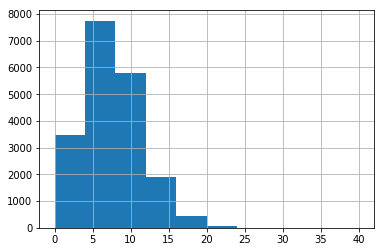

In [52]:
%matplotlib inline
x['article_y'].str.split().str.len().hist()



## Correct missing title manually

In [442]:
x.loc[x['articleLink'] == 'https://medium.com/@PeterBruce/be-smarter-than-your-devices-learn-about-big-data-e27e60c9e15a', 
      'article_y'] = "Be Smarter Than Your Devices: Learn About Big Data"

## Merge titles

In [443]:
for index, row in x.iterrows():
    if row['article_x'] != row['article_y']:
        x.loc[index, 'article_titles'] = str(row['article_x']) + ' ' + str(row['article_y'])
    else:
        x.loc[index, 'article_titles'] = str(row['article_x'])

In [444]:
x.head(15)

,NumOfClaps,NumOfComments,article_x,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink,article_y,article_titles
0,NaN,NaN,Prescriptive Analytics and My Heart,"Analytics,Data Science,Health",https://medium.com/@neuralmarket,Thomas Ott,"Jan 8, 2015",2 min read,https://medium.com/@neuralmarket/prescriptive-analytics-and-my-heart-849a621bcba8,Prescriptive Analytics and My Heart,Prescriptive Analytics and My Heart
1,NaN,NaN,Deep Learning on Hadoop 2.0,"Java,Apache,Data Science,Deep Learning,Engineering",https://medium.com/@paypaleng,PayPal Engineering,"Jan 12, 2015",8 min read,https://medium.com/paypal-engineering/deep-learning-on-hadoop-2-0-16b4db3c65dc,Deep Learning on Hadoop 2.0,Deep Learning on Hadoop 2.0
2,2 claps,NaN,Logistic Regression : Measuring landing page effectiveness using SAS Software,"Data Science,Statistics",https://medium.com/@opendata,amit,"Jan 11, 2015",5 min read,https://medium.com/@opendata/logistic-regression-a-case-example-on-landing-page-effectiveness-using-sas-software-1a0357c7b117,Logistic Regression : Measuring landing page effectiveness using SAS Software,Logistic Regression : Measuring landing page effectiveness using SAS Software
3,14 claps,NaN,Show Me The Data: Using Graphics for Exploratory Data Analysis,"Insight Data Science,Data Science",https://blog.insightdatascience.com/@InsightData,Insight,"Jan 20, 2015",6 min read,https://blog.insightdatascience.com/show-me-the-data-using-graphics-for-exploratory-data-analysis-d686af4468f6,Show Me The Data: Using Graphics for Exploratory Data Analysis,Show Me The Data: Using Graphics for Exploratory Data Analysis
4,NaN,NaN,Change the Model. Change the World,"Data Science,Data Security,Computer Science",https://medium.com/@DhrylAnton,Dhryl Anton,"Jan 26, 2015",10 min read,https://medium.com/my-cloud-mode/change-the-model-change-the-world-af3192e22bd2,Change the Model. Change the World.,Change the Model. Change the World Change the Model. Change the World.
5,NaN,NaN,Exploratory Data Analysis and Graphics,"Data Science,Data Visualization",https://medium.com/@astrobiased,Eli Bressert,"Jan 19, 2015",5 min read,https://medium.com/@astrobiased/exploratory-data-analysis-and-graphics-9943dc2fb26,Exploratory Data Analysis and Graphics,Exploratory Data Analysis and Graphics
6,NaN,NaN,Hortonworks White Paper: The Rise of the Data-First Enterprise,"Big Data,Data Science,White Papers",https://medium.com/@OpexAnalytics,Opex Analytics,"Jan 21, 2015",,https://medium.com/@OpexAnalytics/hortonworks-white-paper-the-rise-of-the-data-first-enterprise-65020f491334,Hortonworks White Paper: The Rise of the Data-First Enterprise,Hortonworks White Paper: The Rise of the Data-First Enterprise
7,8 claps,NaN,The future of machine learning at Pinterest,"Machine Learning,Artificial Intelligence,Kosei,Pinterest,Datascience",https://medium.com/@Pinterest_Engineering,Pinterest Engineering,"Jan 21, 2015",2 min read,https://medium.com/@Pinterest_Engineering/the-future-of-machine-learning-at-pinterest-88e6d4bf1968,The future of machine learning at Pinterest,The future of machine learning at Pinterest
8,7 claps,NaN,Verdigris Data Scientist,"Data Science,IoT,Energy,Machine Learning,Jobs",https://medium.com/@jwkvam,Jacques Kvam,"Jan 30, 2015",3 min read,https://medium.com/@jwkvam/verdigris-data-scientist-e1fe05d1afdd,Verdigris Data Scientist,Verdigris Data Scientist
9,25 claps,NaN,Creative and Critical Use of Complex Networks,"Data Visualization,Big Data,Creativity,Productivity,Data Science",https://medium.com/@arikan,Burak Arikan,"Jan 27, 2015",5 min read,https://medium.com/graph-commons/creative-and-critical-use-of-complex-networks-412fe9eddecb,Creative and Critical Use of Complex Networks,Creative and Critical Use of Complex Networks


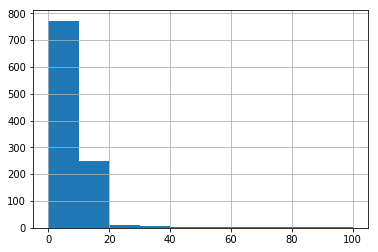

In [445]:
%matplotlib inline

x['article_titles'].str.split().str.len().hist(range=[0, 100])

## Convert "numClaps" column to numeric

In [446]:
x['NumOfClaps'] = x['NumOfClaps'].str.replace('claps', '')

x['NumOfClaps'] = x['NumOfClaps'].str.replace('clap', '')

x['NumOfClaps'].fillna(0, inplace=True)

#['NumOfClaps'] = x['NumOfClaps'].astype(int)

In [447]:
x['NumOfClaps'].isnull().sum()

0

## Fill None values in "NumofComments" column

In [448]:
x['NumOfComments'].fillna(0, inplace=True)

x['NumOfComments'] = x['NumOfComments'].astype(int)

## Fill empty "ReadingTime" column with "1 min read"

In [449]:
import numpy as np

x['readingTime'] = x['readingTime'].str.replace(' min read', '')

x['readingTime'] = x['readingTime'].replace(' ', np.nan)

x['readingTime'].fillna(1, inplace=True)

## Clean up dataframe

In [450]:
x.columns

Index(['NumOfClaps', 'NumOfComments', 'article_x', 'articleTags',
       'linkOfAuthorProfile', 'nameOfAuthor', 'postingTime', 'readingTime',
       'articleLink', 'article_y', 'article_titles'],
      dtype='object')

In [452]:
x.drop(['article_x', 'article_y'], axis=1, inplace=True)

In [454]:
x.head(15)

,NumOfClaps,NumOfComments,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink,article_titles
0,0,0,"Analytics,Data Science,Health",https://medium.com/@neuralmarket,Thomas Ott,"Jan 8, 2015",2,https://medium.com/@neuralmarket/prescriptive-analytics-and-my-heart-849a621bcba8,Prescriptive Analytics and My Heart
1,0,0,"Java,Apache,Data Science,Deep Learning,Engineering",https://medium.com/@paypaleng,PayPal Engineering,"Jan 12, 2015",8,https://medium.com/paypal-engineering/deep-learning-on-hadoop-2-0-16b4db3c65dc,Deep Learning on Hadoop 2.0
2,2,0,"Data Science,Statistics",https://medium.com/@opendata,amit,"Jan 11, 2015",5,https://medium.com/@opendata/logistic-regression-a-case-example-on-landing-page-effectiveness-using-sas-software-1a0357c7b117,Logistic Regression : Measuring landing page effectiveness using SAS Software
3,14,0,"Insight Data Science,Data Science",https://blog.insightdatascience.com/@InsightData,Insight,"Jan 20, 2015",6,https://blog.insightdatascience.com/show-me-the-data-using-graphics-for-exploratory-data-analysis-d686af4468f6,Show Me The Data: Using Graphics for Exploratory Data Analysis
4,0,0,"Data Science,Data Security,Computer Science",https://medium.com/@DhrylAnton,Dhryl Anton,"Jan 26, 2015",10,https://medium.com/my-cloud-mode/change-the-model-change-the-world-af3192e22bd2,Change the Model. Change the World Change the Model. Change the World.
5,0,0,"Data Science,Data Visualization",https://medium.com/@astrobiased,Eli Bressert,"Jan 19, 2015",5,https://medium.com/@astrobiased/exploratory-data-analysis-and-graphics-9943dc2fb26,Exploratory Data Analysis and Graphics
6,0,0,"Big Data,Data Science,White Papers",https://medium.com/@OpexAnalytics,Opex Analytics,"Jan 21, 2015",1,https://medium.com/@OpexAnalytics/hortonworks-white-paper-the-rise-of-the-data-first-enterprise-65020f491334,Hortonworks White Paper: The Rise of the Data-First Enterprise
7,8,0,"Machine Learning,Artificial Intelligence,Kosei,Pinterest,Datascience",https://medium.com/@Pinterest_Engineering,Pinterest Engineering,"Jan 21, 2015",2,https://medium.com/@Pinterest_Engineering/the-future-of-machine-learning-at-pinterest-88e6d4bf1968,The future of machine learning at Pinterest
8,7,0,"Data Science,IoT,Energy,Machine Learning,Jobs",https://medium.com/@jwkvam,Jacques Kvam,"Jan 30, 2015",3,https://medium.com/@jwkvam/verdigris-data-scientist-e1fe05d1afdd,Verdigris Data Scientist
9,25,0,"Data Visualization,Big Data,Creativity,Productivity,Data Science",https://medium.com/@arikan,Burak Arikan,"Jan 27, 2015",5,https://medium.com/graph-commons/creative-and-critical-use-of-complex-networks-412fe9eddecb,Creative and Critical Use of Complex Networks


## Output final data to CSV

In [296]:
x.to_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/processed/medium_scrapy_2014-2015_validated.csv", 
         index=None)